# 使用BaseMap绘制地图

#### —— nmc_met_graphics程序库使用说明

国家气象中心天气预报技术研发室    
Sep, 2020    
Kan Dai 

nmc_met_graphics提供BaseMap类, 用于方便地绘制中国地图.

* 对Cartopy地图绘制进行封装
* 提供中国国界, 省界, 河流和县界等的绘制
* 提供对国家或省份区域外的白化
* 提供天地, Arcgis等背景图

## Prepare

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
# load libraries
import matplotlib.pyplot as plt

from nmc_met_io.retrieve_micaps_server import get_model_grid
from nmc_met_graphics.plot.mapview import BaseMap
from nmc_met_graphics.util import get_plot_attrs

In [7]:
# 读取ECMWF模式降水预报数据
data = get_model_grid('ECMWF_HR/RAIN24', filename='21081708.036')
data

<xarray.Dataset>
Dimensions:                  (time: 1, lat: 601, lon: 1301)
Coordinates:
  * time                     (time) datetime64[ns] 2021-08-18T20:00:00
  * lat                      (lat) float64 6.735e-06 0.1 0.2 ... 59.8 59.9 60.0
  * lon                      (lon) float64 50.0 50.1 50.2 ... 179.8 179.9 180.0
    forecast_reference_time  datetime64[ns] 2021-08-17T08:00:00
    forecast_period          (time) float64 36.0
Data variables:
    data                     (time, lat, lon) float32 0.9689 0.7858 ... 12.88
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra Server

In [11]:
# 提取数据的值及经纬度信息
lon   = data.coords['lon'].values    # 经度
lat   = data.coords['lat'].values    # 纬度
time  = data.coords['forecast_reference_time'].values    # 时间
fhour = data.coords['forecast_period'].values    # 预报时效
data  = data['data'].values

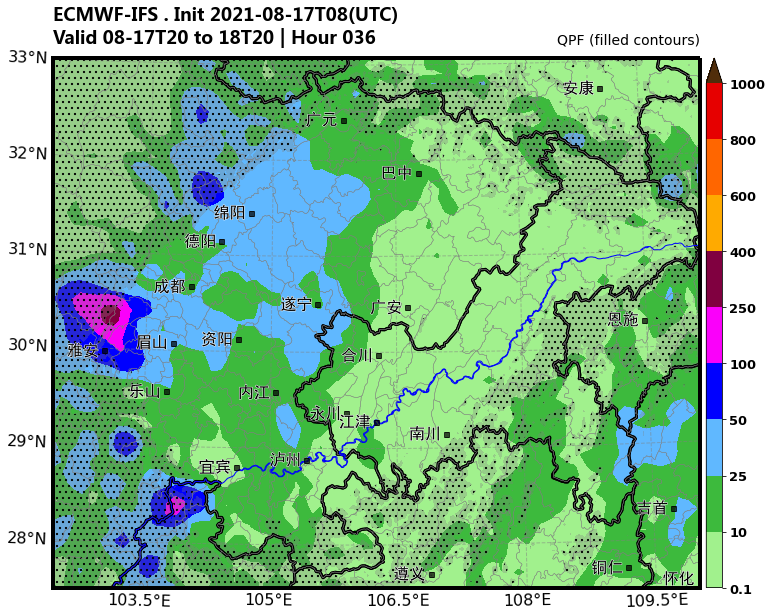

In [22]:
# 绘制图形

# 设置地图画板
m = BaseMap(projection="LambertConformal", 
            central_longitude=106.0, central_latitude=31.0)
fig = plt.figure(figsize=[12, 12])
m.ax = fig.add_subplot(1,1,1, projection=m.proj)

# 绘制地图背景及设置地图范围
m.drawbasemap(style='white')
m.set_extent('四川盆地')

# 绘制定量降水填充等值线落区
plt_attrs = get_plot_attrs('nmc_accumulated_rainfall')    # 获取降水的等值线间隔和颜色条.
cnf = m.contourf(lon, lat, data, levels=plt_attrs['clevs'], cmap=plt_attrs['cmap'],
                 norm=plt_attrs['norm'], extend='max')
m.colorbar(mappable=cnf)

# 绘制标题
m.left_title('ECMWF-IFS', time=time, fhour=fhour, atime=24, time_zone='UTC')
m.right_title('QPF (filled contours)')
m.gridlines()

# 绘制地形阴影
m.topo_hatches(levels=[1000, 10000], hatches=['..'])

# 添加主要观测站点城市
m.cities(city_type='base_station', color_style='black', font_size=16)

# 显示图形
plt.show()